# Capstone Project - Predicting The Risk Of Customer Churn 

## Feature Engineering - Defining Churn
***

### Author - Oyeronke Ayansola

### Date - 12/12/2022

### <font color=red> Notebook #2</font>

***

## Table of Contents
### [Import Libraries And Dataset](##ImportingLibrariesAndDatasets)
### [RFM Features](##RFMFeatures)
### [Other Features](##OtherFeatures)
### [Churn Profiling](##ChurnProfiling)
### [Datetime Split](##DatetimeSplit)
### [Conclusion](##Conclusion)
***

The goal of this notebook is to create features neccessary to give better insight of our data, profile customers, and define churn customers.
***

We will import the dataset and all packages neccessary for this notebook.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


from datetime import datetime

In [2]:
# import dataset from notebook 1
df = pd.read_csv('cleaned_df.csv')


In [3]:
# see the head
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_latitude,customer_longitude,order_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,seller_latitude,seller_longitude
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509898,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,8683.0,54.0,64.0,31.0,office_furniture,8577.0,itaquaquecetuba,SP,-23.482623,-46.374490
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.509898,-47.397866,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,...,1383.0,50.0,10.0,40.0,bed_bath_table,14940.0,ibitinga,SP,-21.766477,-48.831547
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.509898,-47.397866,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,...,1200.0,47.0,7.0,26.0,toys,89204.0,joinville,SC,-26.283149,-48.851285
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.509898,-47.397866,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,...,567.0,19.0,14.0,15.0,auto,4243.0,sao paulo,SP,-23.626269,-46.586534
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.509898,-47.397866,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,...,300.0,20.0,7.0,15.0,telephony,1212.0,sao paulo,SP,-23.537511,-46.637057


In [4]:
# see the shape
df.shape

(112637, 42)

We have 112,637 rows and 42 columns. 

In [5]:
# check datatypes
df.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
customer_latitude                float64
customer_longitude               float64
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
review_id       

In [6]:
# assign all columns with date and time to a dataframe
date_time_columns =['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                    'order_delivered_customer_date',
                           'order_estimated_delivery_date','shipping_limit_date', 'review_creation_date', 
                    'review_answer_timestamp']

In [7]:
# convert all date columns to datetime data type
df[date_time_columns] = df[date_time_columns].apply(pd.to_datetime)

In [8]:
# sanity check
df.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
customer_latitude                       float64
customer_longitude                      float64
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_item_id                           float64
product_id                               object
seller_id                               

All date columns were converted to datetime data type.

In [10]:
#Let's see the min amd max order date in our dataset
print("Minimun time stamp is" , df['order_purchase_timestamp'].min())
print("Maximum time stamp is", df['order_purchase_timestamp'].max())

Minimun time stamp is 2016-10-03 09:44:50
Maximum time stamp is 2018-08-29 15:00:37


So, our data is from October 2016 to September 2018 with first order made on October 3rd and last order made on September 29th 2018. We will use the last order date as our current date so as to simulate the age of our customers.

### RFM - Recency, Frequency and Monetary Value

RFM is a method that uses existing customer data to understand customers' behavior and to predict how a new customer is likely to act in the future. The three key factors use are:

1. Recency - how recently a customer has transacted with a brand
2. Frequency - how frequently they have engaged with a brand
3. Monetary - how much money they have spent on a brand’s products and services
***
Reference - Facundo J.E. (2021). Customer Churn - prevention model - prediction model. *MDPI*, 6, 1-12.
***

In other to profile customers, we need to create these features.


### Recency

This is the time difference between customers' first purchase and the last purchase, that is, the time that has passed since the first and most recent purchase of a customer.

Let us now calculate recency based on the last time customers' order was approved.

In [11]:
# specify last purchase date and creating datetime object from the given string
today = '2018-08-29'
date_today = datetime.strptime(today, '%Y-%m-%d')
print(type(date_today))


<class 'datetime.datetime'>


In [15]:
# create a dataframe and determine customer last order
recency_df = df.groupby('customer_unique_id')['order_approved_at'].max().reset_index()

The column with customer last order will be renamed as `most_recent` - which is the most recent time a customer interact with Olist.

In [16]:
# set the column as 'most recent'
recency_df.columns = ['customer_unique_id', 'most_recent']

In [17]:
# see the datatypes
recency_df.dtypes

customer_unique_id            object
most_recent           datetime64[ns]
dtype: object

Now that we know the `most_recent` time of our customer, we will calculate `recency` by subtracting the minimum `most_recent` from the maximum, this will give us the age of each customer i.e the first day they interact with Olist from their most recent purchase.

In [18]:
# Calculating recency
recency_df['recency'] = (recency_df['most_recent'].max() - recency_df['most_recent']).dt.days


In [19]:
# see the dataframe
recency_df

,customer_unique_id,most_recent,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,113
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,536
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,320
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,287
...,...,...,...
91014,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,446
91015,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,261
91016,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,567
91017,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,118


In [20]:
# check the shape
recency_df.shape

(91019, 3)

Our recency dataframe has 91,019 rows and 3 columns.

In [17]:
#frequency_df = pd.DataFrame(df.groupby(['customer_unique_id']).agg({'order_id': 'nunique' }).reset_index())

### Frequency

The total number of purchases for each customer over the entire time period they are present in the dataset.

Let us define the frequency column by grouping and `customer_unique_id` - which is the unique identity for each customer, then counting the number of times a customer interacted with Olist.

In [21]:
# create the frequency dataframe
frequency_df = pd.DataFrame(df.groupby('customer_unique_id')['customer_id'].count())

In [22]:
# see the dataframe
frequency_df

,customer_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


In [23]:
# rename the customer id column 
frequency_df = frequency_df.rename(columns = {'customer_id' : 'frequency'})

In [24]:
# sanity check
frequency_df

,frequency
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


In [25]:
# see frequency unique number 
frequency_df.nunique()

frequency    26
dtype: int64

### Monetary

How much did each customer spend on order purchase at Olist? The monetary value will give us the total ammount each customer spent at Olist. We will use `payment_value` to calculate the monetary value of each customer.

In [26]:
# create a dataframe with customer payment value
Monetary_df = df.groupby('customer_unique_id', as_index = False)['payment_value'].sum()

In [27]:
# rename to monetary
Monetary_df.columns = ['customer_unique_id', 'monetary']

In [28]:
# see the dataframe
Monetary_df

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
91014,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84
91015,fffea47cd6d3cc0a88bd621562a9d061,84.58
91016,ffff371b4d645b6ecea244b27531430a,112.46
91017,ffff5962728ec6157033ef9805bacc48,133.69


Let us merge the three dataframes together as RFM.

In [29]:
# create RFM dataframe
rfm_df = frequency_df.merge(recency_df, on = 'customer_unique_id', \
                              how = 'left').merge(Monetary_df,on = 'customer_unique_id', \
                                                                      how = 'left')


In [30]:
rfm_df = rfm_df[['customer_unique_id', 'frequency', 'recency', 'monetary']]

In [31]:
# see the dataframe
rfm_df

,customer_unique_id,frequency,recency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,1,111,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,113,27.19
2,0000f46a3911fa3c0805444483337064,1,536,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,1,320,43.62
4,0004aac84e0df4da2b147fca70cf8255,1,287,196.89
...,...,...,...,...
91014,fffcf5a5ff07b0908bd4e2dbc735a684,2,446,4134.84
91015,fffea47cd6d3cc0a88bd621562a9d061,1,261,84.58
91016,ffff371b4d645b6ecea244b27531430a,1,567,112.46
91017,ffff5962728ec6157033ef9805bacc48,1,118,133.69


In [32]:
#see the shape
rfm_df.shape

(91019, 4)

We will need rfm dataframe later - for clustering in notebook #5, let us now save it as csv file.

In [33]:
#save rfm dataframe
rfm_df.to_csv('rfm_df.csv', index = False)

### Other Features

Let us create more features that we will use in data exploratory, notebook #3.

In [34]:
# check datatypes
df.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
customer_latitude                       float64
customer_longitude                      float64
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_item_id                           float64
product_id                               object
seller_id                               

We have all time stamp as datetime which is good. Can we generate features that will give us more insight on the delivery times? These are:

1. **customer delivery time** - The time the order was received by customer
2. **estimated delivery time** - The time given by Olist for expected delivery
3. **carrier delivery date** - The time the delivery courier is expected to deliver
4. **delivery_time_diff** - The difference in estimated delivery to when the the order was actually delivered
5. **carrier_date_diff** - The difference in courier delivery to when the the order was actually delivered


In [35]:
df['customer_delivery_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['estimated_delivery_time'] = df['order_estimated_delivery_date'] - df['order_purchase_timestamp'] 
df['carrier_delivery_date']= df['order_delivered_carrier_date'] - df['order_purchase_timestamp']
df['delivery_time_diff'] = df['order_estimated_delivery_date'] - df ['order_delivered_customer_date']
df['carrier_date_diff'] = df['customer_delivery_time'] - df ['carrier_delivery_date']


Next, let us define the total price, cost and freight cost for customers

In [36]:
# create df for each total items customer purchase
total_item_per_customer = df[['order_id', 'order_item_id']].groupby('order_id').max().reset_index()
total_item_per_customer.rename (columns = {'order_item_id': 'total_item_per_customer'}, inplace = True)
df = df.merge(total_item_per_customer, on = 'order_id')

In [37]:
# define price, frieght total cost 
df['total_customer_price'] = df['total_item_per_customer']* df['price']
df['total_frieght_price'] = df['freight_value']*df['total_item_per_customer']
df['total_customer_cost'] = df['total_customer_price'] + df['total_frieght_price']

In [38]:
# sanity check
df.shape

(112637, 51)

Now that we have features defined, let us merge the `RFM` dataframe with our dataframe

In [39]:
# merge the dataframes
cleaned_df_final = df.merge(rfm_df, on = 'customer_unique_id', how = 'left')

In [40]:
# sanity check
cleaned_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112637 entries, 0 to 112636
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    112637 non-null  object         
 1   customer_unique_id             112637 non-null  object         
 2   customer_zip_code_prefix       112637 non-null  int64          
 3   customer_city                  112637 non-null  object         
 4   customer_state                 112637 non-null  object         
 5   customer_latitude              112637 non-null  float64        
 6   customer_longitude             112637 non-null  float64        
 7   order_id                       112637 non-null  object         
 8   order_status                   112637 non-null  object         
 9   order_purchase_timestamp       112637 non-null  datetime64[ns] 
 10  order_approved_at              112637 non-null  datetime

Let us convert all `timedelta64` to interger.

In [43]:
cleaned_df_final[['customer_delivery_time', 
                  'estimated_delivery_time', 
                  'carrier_delivery_date', 
                  'delivery_time_diff', 
                  'carrier_date_diff']] = cleaned_df_final[['customer_delivery_time',
                                                            'estimated_delivery_time',
                                                            'carrier_delivery_date',
                                                            'delivery_time_diff', 
                                                            'carrier_date_diff']].astype('timedelta64[D]').astype(int)

In [46]:
# sanity check
cleaned_df_final.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
customer_latitude                       float64
customer_longitude                      float64
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_item_id                           float64
product_id                               object
seller_id                               

In [42]:
# see the shape
cleaned_df_final.shape

(112637, 54)

We now have 112,637 rows and 54 columns.

### Churn Profiling

Let us define our hypothesis for profiling 'likely churn' customers. We will use the recency column to define churn. This is because in reality, loyal customers often visit or interact with an industry on a regular basis. If a customer did not patronise a business for a certain/defined period, it is most likely such customer is no more interested in the industry services or products. 

Let us check the median and interquartile ranges of `recency` 

/Users/dolphin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


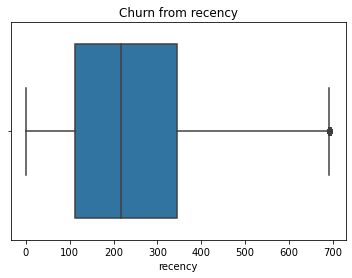

In [47]:
sns.boxplot(cleaned_df_final['recency'])
plt.title('Churn from recency')
plt.show()

The median is a little above 200 days. Moreover, we can see that olist customers' recency ranges from 100 to approximately 350 days. Let us check the quantiles range.

In [48]:
quantiles = cleaned_df_final['recency'].quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()

{0.25: 113.0, 0.5: 217.0, 0.75: 344.0}

Here, **25% = 113 days**, **50% = 217 days** and **75% to 344 days**. We can assume that customers that did not interact with Olist after 75% quantile may likely to have churn. Since 344 days is close to one year (365 days), we will profile churn with `365 days`. Therefore, customers that have recency **greater than 365 will be referred to as churn**.

1. **Customers with >365 = 0 - Churn**
2. **Customers with < 365 = 1 - Not churn**

In [49]:
# create the churn column

cleaned_df_final['churn'] = np.where(cleaned_df_final['recency']>365, 0, 1)


In [50]:
# sanity check
cleaned_df_final

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_latitude,customer_longitude,order_id,order_status,order_purchase_timestamp,...,delivery_time_diff,carrier_date_diff,total_item_per_customer,total_customer_price,total_frieght_price,total_customer_cost,frequency,recency,monetary,churn
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509898,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,10,1,1.0,124.99,21.88,146.87,1,469,146.87,0
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.509898,-47.397866,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,...,13,2,1.0,79.90,14.87,94.77,1,74,94.77,1
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.509898,-47.397866,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,...,13,7,1.0,44.90,17.60,62.50,1,353,62.50,1
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.509898,-47.397866,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,...,14,1,1.0,19.90,12.79,32.69,1,156,32.69,1
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.509898,-47.397866,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,...,5,3,1.0,63.90,13.11,77.01,1,30,77.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112632,0b7a30ba373aeb55cf28add5b5477956,8c8173e547e020f411aa55b2fceed861,87145,paicandu,PR,-23.501992,-52.150755,e12f5458c6b4f349a97fbf22e08d17ac,delivered,2017-08-01 12:57:02,...,7,12,1.0,59.90,17.67,77.57,1,392,77.57,0
112633,ff6b440b2465bfaef05c675efb48cd15,e38a27b979a552e019e297ecc22dc67b,98860,eugenio de castro,RS,-28.525792,-54.145061,82a11e82ea02c7e3381366e935c1126e,delivered,2018-05-23 09:07:46,...,0,12,1.0,97.00,14.76,111.76,1,96,111.76,1
112634,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,-23.588504,-46.737870,6e9f8d6156d8c37f0e0e6351908de639,delivered,2018-03-28 12:28:04,...,5,11,1.0,61.80,13.79,75.59,1,154,75.59,1
112635,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.823261,-49.247368,e65fa5f31ce4436d38bcf5e109fd43e4,delivered,2018-01-24 17:53:44,...,-2,21,1.0,120.00,39.77,159.77,3,166,483.81,1


In [51]:
# recheck the values for churn
cleaned_df_final['churn'].unique()

array([0, 1])

In [52]:
# check the number of churn or not
cleaned_df_final.groupby('churn')['customer_unique_id'].nunique()


churn
0    19900
1    71119
Name: customer_unique_id, dtype: int64

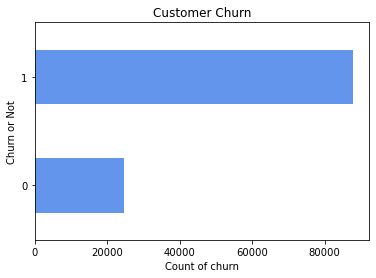

In [53]:
# plot churn
cleaned_df_final['churn'].value_counts().sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('Customer Churn')
plt.ylabel('Churn or Not')
plt.xlabel('Count of churn')
plt.show()

We have an imbalance data with **Not churn i.e 1** in the majority class and **Churn i.e 0** in the minority class.

In [57]:
# see shape
cleaned_df_final.shape

(112637, 55)

### Datetime Split

Let us split the timestamps into year, month and day and drop the original timestamp columns.

In [58]:
# year from `Review_Date` column
cleaned_df_final['order_purchase_year'] = pd.to_datetime(cleaned_df_final['order_purchase_timestamp']).dt.year
# year from `Review_Date` column
cleaned_df_final['order_delivered_carrier_year'] = pd.to_datetime(cleaned_df_final['order_delivered_carrier_date']).dt.year
# year from `Review_Date` column
cleaned_df_final['order_delivered_customer_year'] = pd.to_datetime(cleaned_df_final['order_delivered_customer_date']).dt.year
# year from `Review_Date` column
cleaned_df_final['order_estimated_delivery_year'] = pd.to_datetime(cleaned_df_final['order_estimated_delivery_date']).dt.year
# year from `Review_Date` column
cleaned_df_final['shipping_limit_year'] = pd.to_datetime(cleaned_df_final['shipping_limit_date']).dt.year
# year from `Review_Date` column
cleaned_df_final['review_creation_year'] = pd.to_datetime(cleaned_df_final['review_creation_date']).dt.year
# year from `Review_Date` column
cleaned_df_final['review_answer_year'] = pd.to_datetime(cleaned_df_final['review_answer_timestamp']).dt.year


In [59]:
# year from `Review_Date` column
cleaned_df_final['order_purchase_month'] = pd.to_datetime(cleaned_df_final['order_purchase_timestamp']).dt.month
# year from `Review_Date` column
cleaned_df_final['order_delivered_carrier_month'] = pd.to_datetime(cleaned_df_final['order_delivered_carrier_date']).dt.month
# year from `Review_Date` column
cleaned_df_final['order_delivered_customer_month'] = pd.to_datetime(cleaned_df_final['order_delivered_customer_date']).dt.month
# year from `Review_Date` column
cleaned_df_final['order_estimated_delivery_month'] = pd.to_datetime(cleaned_df_final['order_estimated_delivery_date']).dt.month
# year from `Review_Date` column
cleaned_df_final['shipping_limit_month'] = pd.to_datetime(cleaned_df_final['shipping_limit_date']).dt.month
# year from `Review_Date` column
cleaned_df_final['review_creation_month'] = pd.to_datetime(cleaned_df_final['review_creation_date']).dt.month
# year from `Review_Date` column
cleaned_df_final['review_answer_month'] = pd.to_datetime(cleaned_df_final['review_answer_timestamp']).dt.month


In [60]:
# year from `Review_Date` column
cleaned_df_final['order_purchase_day'] = pd.to_datetime(cleaned_df_final['order_purchase_timestamp']).dt.day
# year from `Review_Date` column
cleaned_df_final['order_delivered_carrier_day'] = pd.to_datetime(cleaned_df_final['order_delivered_carrier_date']).dt.day
# year from `Review_Date` column
cleaned_df_final['order_delivered_customer_day'] = pd.to_datetime(cleaned_df_final['order_delivered_customer_date']).dt.day
# year from `Review_Date` column
cleaned_df_final['order_estimated_delivery_day'] = pd.to_datetime(cleaned_df_final['order_estimated_delivery_date']).dt.day
# year from `Review_Date` column
cleaned_df_final['shipping_limit_day'] = pd.to_datetime(cleaned_df_final['shipping_limit_date']).dt.day
# year from `Review_Date` column
cleaned_df_final['review_creation_day'] = pd.to_datetime(cleaned_df_final['review_creation_date']).dt.day
# year from `Review_Date` column
cleaned_df_final['review_answer_day'] = cleaned_df_final['review_answer_timestamp'].dt.day

In [61]:
# sanity check
cleaned_df_final.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_latitude,customer_longitude,order_id,order_status,order_purchase_timestamp,...,shipping_limit_month,review_creation_month,review_answer_month,order_purchase_day,order_delivered_carrier_day,order_delivered_customer_day,order_estimated_delivery_day,shipping_limit_day,review_creation_day,review_answer_day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509898,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,5,5,5,16,23,25,5,22,26,30
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.509898,-47.397866,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,...,6,6,6,15,18,21,5,19,22,26
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.509898,-47.397866,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,...,9,9,9,9,11,18,2,14,19,20
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.509898,-47.397866,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,...,3,3,11,26,27,28,12,30,29,4
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.509898,-47.397866,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,...,2,4,4,29,31,3,9,8,8,8


In [62]:
# check the shape
cleaned_df_final.shape

(112637, 76)

In [63]:
# check the datatypes
cleaned_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112637 entries, 0 to 112636
Data columns (total 76 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   customer_id                     112637 non-null  object        
 1   customer_unique_id              112637 non-null  object        
 2   customer_zip_code_prefix        112637 non-null  int64         
 3   customer_city                   112637 non-null  object        
 4   customer_state                  112637 non-null  object        
 5   customer_latitude               112637 non-null  float64       
 6   customer_longitude              112637 non-null  float64       
 7   order_id                        112637 non-null  object        
 8   order_status                    112637 non-null  object        
 9   order_purchase_timestamp        112637 non-null  datetime64[ns]
 10  order_approved_at               112637 non-null  datetim

In [64]:
# drop the orinal timestamp columns
cleaned_df_final.drop(['order_purchase_timestamp', 'shipping_limit_date',
         'order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date',
         'order_approved_at', 'review_creation_date', 'review_answer_timestamp'], axis=1, inplace = True)

In [65]:
# sanity check
cleaned_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112637 entries, 0 to 112636
Data columns (total 68 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   customer_id                     112637 non-null  object 
 1   customer_unique_id              112637 non-null  object 
 2   customer_zip_code_prefix        112637 non-null  int64  
 3   customer_city                   112637 non-null  object 
 4   customer_state                  112637 non-null  object 
 5   customer_latitude               112637 non-null  float64
 6   customer_longitude              112637 non-null  float64
 7   order_id                        112637 non-null  object 
 8   order_status                    112637 non-null  object 
 9   payment_sequential              112637 non-null  float64
 10  payment_type                    112637 non-null  object 
 11  payment_installments            112637 non-null  float64
 12  payment_value   

We now have 68 columns and 112,637 rows. Let us check for duplicates and null values if there is any, we will drop them.

In [66]:
# check for duplicates
cleaned_df_final['order_id'].duplicated().sum()

18635

In [67]:
# delete duplicates rows
cleaned_df_final = cleaned_df_final.drop_duplicates(subset=['order_id'], keep='first')

In [68]:
# sanity check
cleaned_df_final['order_id'].duplicated().sum()

0

In [69]:
# check for null values
cleaned_df_final.isnull().sum().any()

False

All is set! We will export the dataframe as csv file and use in notebooks 3 - EDA and 4- Modeling

In [70]:
cleaned_df_final.to_csv('df2_engineered.csv', index = False)

### Conclusion

In this Notebook, we have been able to create different features relating to customers' total cost and delivery times. We have our customers profiled based on thier 'age' with Olist, the number of times they have visited and thier total monetary values, but most importantly, we have defined our target variable **churn** based on the recency i.e age of customers. The **final dataframe** will be used for data exploration and modeling in **Notebook 3** and **Notebook 4**, while **RFM dataframe** will be used in **Notebook 5**. 